## Autonomous Mobile Robot Pallet Truck inside a Smart Factory

Table of contents
 - Overview
 - Project of the AMR Pallet Truck
   - The amr_description package: creation of the AMR Pallet Truck
    - The geometry of the AMR
 - Installation
 - Usage
 
### Overview

The four industrial revolution (4IR) pushes the manufacturing industry to an integration with newest technologies like the Artificial Intelligence, additive manufacturing, augmented reality and the IoT internet of things. The 4IR also includes an advanced in connectivity between machines, robots, sensors, etc. that it gives rise to “smart factories”.

The following project refers to a smart factory in which the IoT, the advanced connectivity and the ROS technology allow an autonomous management of the raw and waste materials. In particular, the environment, shown in the figure 1, reproduces a mechanical workshop for working metals with numerical control machines where an AMR pallet truck ensures the handling of both raw or semi-finished pieces and the transport of residual metal shaving.

<img src="images/mechanical_workshop.png" width="600"/>

Figure 1.: Mechanical workshop environment. (1) AMR pallet trucks, (2) CNC machine, (3) full chip bin, (4) empty chip bin.

In the following scenario, it staged an example of management of the residual metal chip bin by the AMR pallet truck using a web interface, as shown in figure 2. It leaves the fully automatic management to a later implementation.

<img src="images/webinterface.png" width="600"/>

Figure 2.: Web Interface. Buttons: (1) go to full bin, (2) fork the bin, (3) elevator up, (4) go to recycling, (5) elevator down, (6) disengagement bin, (7) recycling bin, (8) go to empty bin, (9) go to cnc machine, (10) go home, (11) move forward, (12) move backward, (13) move turn CW, (14) move turn CCW, (15) stop, (16) connect/disconnect. Readings: (17) odometry position, (18) obstacle distances.

### Project of the AMR Pallet Truck
The project, created using ROS Noetic and Python language, has been divided into 9 packages, listed as follows:

- amr_description
- amr_detection
- amr_disengagement
- amr_environment
- amr_localization
- amr_mapping
- amr_navigation
- amr_rendezvous
- amr_webpage

### The amr_description package: creation of the AMR Pallet Truck
The AMR pallet truck, of figure 1, has a mass of 90 kg and occupies an area of 1 x 1.2 metres. It is equipped with:
- two differential driving wheels;
- two caster wheels;
- one front laser scanner (FOV 180 degree);
- one rear laser scanner (FOV 60 degree);
- two lifting forks.

The design of a first virtual model was created in PTC Creo Parametric CAD, inspired by a manual pallet truck. The CAD model is shown in figure 2.

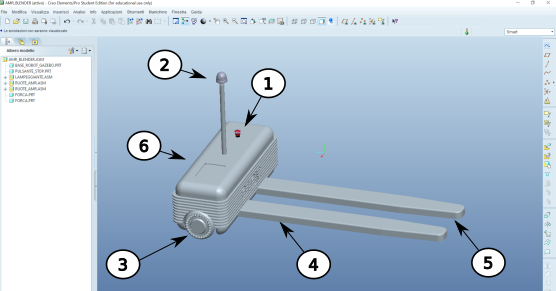

Figure 3. CAD model of the AMR Pallet truck, (1) emergency stop button, (2) flashing lamp, (3) differential driving wheels, (4) lifting forks, (5) caster wheels, (6) chassis.

From PTC Creo, each piece, of figure 3, was exported in *.stl* format to the *Blender* environment where the colors were added and finally exported again in *.dae* format. 

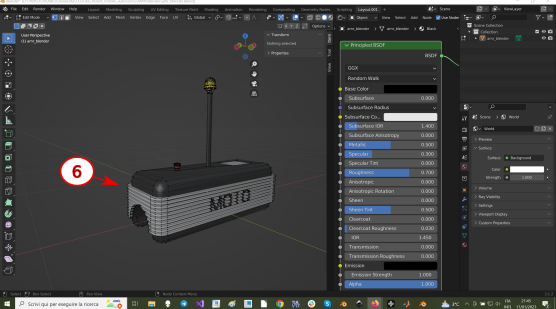

The creation of the AMR Pallet Truck robot has been made inside the package amr_description organized in the following forlders structure:
- config
  - amr_controller.yaml
- launch
  - amr_joints_control.launch
  - amr_urdf_visualize.launch
  - elevator_service_server.launch
  - main_project.launch
- models
  - meshes
- rviz
- scripts
- srv
- urdf
- worlds

The *urdf* folder contains the file *amr.xacro* which is an virtual description of the AMR in terms of *geometry*, *sensors* and *actuators*.
### The geometry of the AMR
The XACRO techology allows to use parameters and MACROS useful when it needs to repeat parts like the driving wheels and the caster wheels. Also, the parameters enable to modify mass, moments of inertia, morphology, etc. quickly and without entering the code. In particular, the geometric parameters values have been obtained from the CAD, figure 3. A short excerpt follows:

In [ ]:
    <xacro:macro name="driving_wheel_link" params="number colour">
        
        <link name="driving_wheel_M${number}_link">    
            
            <visual>
                <origin xyz="0 0 0" rpy="0 0 0"/>
                <geometry>
                    <mesh filename="package://amr_description/models/meshes/amr_wheel.dae"/>
                </geometry>
                <material name="blue"/>
            </visual>  

            <collision>
                <origin xyz="0 0 0" rpy="0 0 0"/>
                <geometry>
                    <cylinder length="${dwt}" radius="${dwr}"/>
                </geometry>
            </collision>  

            <inertial>
                <origin xyz="0 0 0" rpy="0 0 0"/>            
                <mass value="${dwm}" />
                <inertia ixx="${dw_ixx}" ixy="0.0" ixz="0.0" iyy="${dw_iyy}" iyz="0.0" izz="${dw_izz}"/>
            </inertial>        

        </link>

        <gazebo reference="driving_wheel_M${number}_link">
            <kp>25000.0</kp>
            <kd>25000.0</kd>
            <mu1>10.0</mu1>
            <mu2>10.0</mu2>
            <!--material>Gazebo/${colour}</material--> <!-- to enable the color of .dae files -->
        </gazebo>

    </xacro:macro>

Code 1. MACROS defining the driving wheels link

In the above code, with the tags *< visual >* and *< collision >* are defined respectively: the appearance via the meshes .dae file, and the force reaction cylinder, with the parameters *dwt* and *dwr* specified below.

In [ ]:
    <!-- driving wheels property -->
    <xacro:property name="dwm" value="0.6" />                                  
    <xacro:property name="dwd" value="0.200" />                                
    <xacro:property name="dwr" value="${dwd/2}" />                            
    <xacro:property name="dwt" value="0.044" />              

Code 2. dwm: driving wheel mass, [kg], dwd: driving wheel diameter, [m] , dwr: driving wheel radius, [m], dwt: driving wheel tread, [m].

In [ ]:
    <xacro:property name="dw_ixx" value="${(dwm/12.0)*(3*dwr*dwr+dwt*dwt)}" />  
    <xacro:property name="dw_iyy" value="${dw_ixx}" />                         
    <xacro:property name="dw_izz" value="${(dwm*dwr*dwr)/2.0}" />                      

code 3. dw_ixx: driving wheel inertia x axis, [kgm^2] , dw_iyy: driving wheel inertia y axis, [kgm^2], dw_izz: driving wheel inertia z axis, [kgm^2].

Furthermore, the geometry of the AMR is built using the < link > and < joint > tags respecting a logic of parent/child relationships. 

Finally the XACRO file was verified using the following tool.

In [ ]:
xacro amr.xacro > tmp.urdf && check_urdf tmp.urdf && rm tmp.urdf

To easily verify the correctness of the connections made (geometry) the amr_gen.urdf file has visualized, as follow:

In [ ]:
xacro amr.xacro > amr_gen.urdf
urdf_to_graphiz amr_gen.urdf

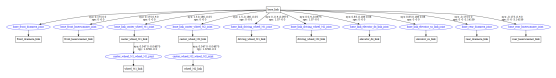

Figure 4.: overall virtual model of the AMR with link-joint connections.

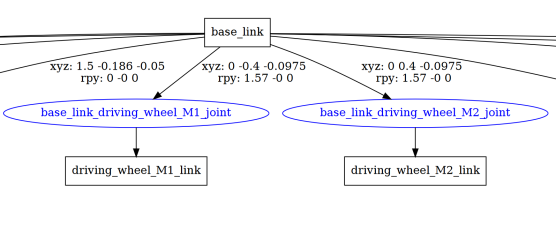

Figure 5.: detail of the AMR virtual model. Rectangular and elliptical shapes represent links (frames) and joints, respectively.

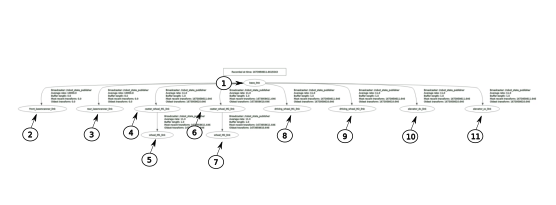

Figure 6.: TF Tree of AMR Pallet Truck: (1) base_link, (2) front_laserscanner_link, (3) rear_laserscanner_link, (4) caster_wheel_M1_link, (5) wheel_M1_link, (6) caster_wheel_M2_link, (7) wheel_M2_link, (8) driving_wheel_M1_link, (9) driving_wheel_M2_link, (10) elevator_dx_link, (11) elevator_sx_link.

Finally, the AMR visualized in RViz appears as follow:

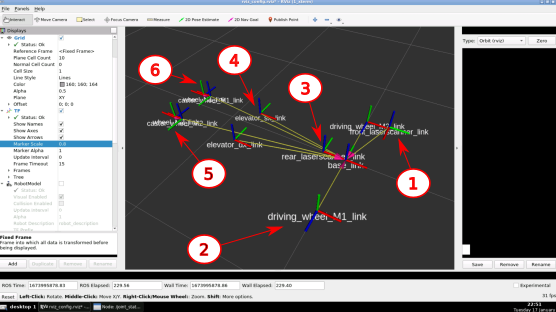

Figure 6.: Visualization of the AMR's link and trasformations in Rviz. (1) front_laserscanner_link, (2) driving_wheel_M1_link, (3) rear_laserscanner_link, (4) elevator_sx_link, (5) caster_wheel_M1_link, (6) wheel_M1_link

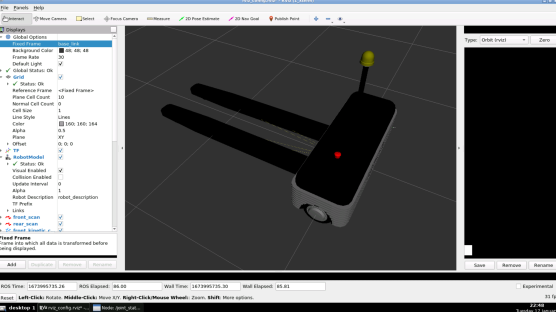

Figure 7.: Visualization of the AMR with meshes in Rviz

### The actuators of AMR
### The sensors of AMR

Another useful tool to verify the geometry is Rviz the allow an tridimensional representation of the AMR

aggiungere due righe su:

laser e plugin

elevatori + set up controllori + messaggio + server

plugin ruote differenziali



robot_state_publisher This package allows you to publish the state of a robot to tf. Once the state gets published, it is available to all components in the system that also use tf. The package takes the joint angles of the robot as input and publishes the 3D poses of the robot links, using a kinematic tree model of the robot.

Joint state publisher is one of the ROS packages that is commonly used to interact with each joint of the robot. The package contains the joint_state_publisher node, which will find the nonfixed joints from the URDF model and publish the joint state values of each joint in the sensor_msgs/JointState message format.

In [ ]:
rosrun rqt_tf_tree rqt_tf_tree

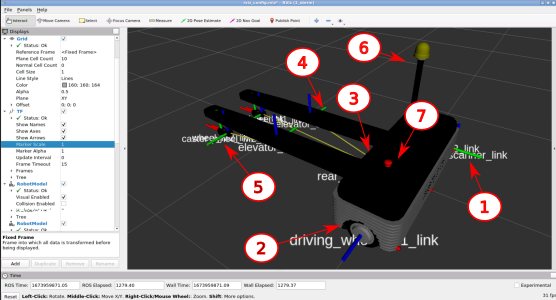

Figure 3.: AMR Pallet Truck: (1) one front laser FOV 180 degree, (2) two differential wheels, (3) one rear laser FOV 60 degree, (4) two elevating forks, (5) two caster wheels (not shown), (6) flashing lamp, (7) emergency botton.
